# How to open multi-solenoid scan database

In [23]:
import h5py, glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 75
import sys

In [24]:
import os

In [25]:
os.path.exists('/sdf/home/e/edelen/.pythonrc')

False

In [26]:
os.path.exists('2020_summer_cu_inj_solscan_data.h5')

True

In [27]:
!pwd

/gpfs/slac/staas/fs1/g/accelerator_modeling/edelen/LCLS_CU_full/Measurements/lcls-cu-inj-surrogate/measurements


In [28]:
 h5 = h5py.File('2020_summer_cu_inj_solscan_data.h5', 'r')

In [67]:
# open file
#onescan   = 'cu_inj_yag02_solscan.h5'
manyscans = '2020_summer_cu_inj_solscan_data.h5'
f         = h5py.File(manyscans, 'r') 
# YAG and 
list(f.keys())

['solenoid_scan_OTR1_2020-06-21T09:48:47',
 'solenoid_scan_OTR2_2020-06-21T10:00:53',
 'solenoid_scan_OTR2_2020-07-09T00:57:46',
 'solenoid_scan_OTR2_2020-07-09T01:07:21',
 'solenoid_scan_OTR2_2020-07-09T02:35:55',
 'solenoid_scan_OTR2_2020-07-09T02:44:37',
 'solenoid_scan_OTR2_2020-07-09T04:45:16',
 'solenoid_scan_OTR3_2020-06-21T10:13:08',
 'solenoid_scan_YAG02_2020-06-21T09:17:33',
 'solenoid_scan_YAG02_2020-06-21T10:28:05',
 'solenoid_scan_YAG02_2020-06-21T14:33:32',
 'solenoid_scan_YAG02_2020-07-09T01:15:53',
 'solenoid_scan_YAG02_2020-07-09T01:32:37',
 'solenoid_scan_YAG02_2020-07-09T03:05:02',
 'solenoid_scan_YAG02_2020-07-09T05:01:14',
 'solenoid_scan_YAG03_2020-06-21T09:27:37',
 'solenoid_scan_YAG03_2020-06-21T09:38:46']

In [68]:
import pandas as pd

In [69]:
f['solenoid_scan_OTR1_2020-06-21T09:48:47'].keys()

<KeysViewHDF5 ['beam_data', 'pvdata']>

In [70]:
list(f['solenoid_scan_OTR1_2020-06-21T09:48:47'].attrs)

['accelerator',
 'beam_names',
 'ctrl_pv',
 'ctrl_pv_unit',
 'file',
 'isotime',
 'matlab_timestamp',
 'screen_name',
 'screen_pv']

In [71]:
list(f['solenoid_scan_OTR1_2020-06-21T09:48:47'].attrs['beam_names'])

['profx',
 'xStat',
 'xStatStd',
 'profy',
 'yStat',
 'yStatStd',
 'profu',
 'uStat',
 'uStatStd',
 'method',
 'stats',
 'statsStd']

In [72]:
list(f['solenoid_scan_OTR1_2020-06-21T09:48:47'].attrs['screen_pv'])

['[',
 "'",
 'O',
 'T',
 'R',
 'S',
 ':',
 'I',
 'N',
 '2',
 '0',
 ':',
 '5',
 '4',
 '1',
 ':',
 'X',
 "'",
 ']']

In [53]:
f['solenoid_scan_OTR1_2020-06-21T09:48:47'].attrs['ctrl_pv']

'SOLN:IN20:121:BCTRL'

In [54]:
f['solenoid_scan_OTR1_2020-06-21T09:48:47'].attrs['ctrl_pv_unit']

'kG-m'

In [57]:
list(f['solenoid_scan_OTR1_2020-06-21T09:48:47']['beam_data'].keys())

['step0',
 'step1',
 'step10',
 'step11',
 'step12',
 'step13',
 'step14',
 'step2',
 'step3',
 'step4',
 'step5',
 'step6',
 'step7',
 'step8',
 'step9']

In [58]:
list(f['solenoid_scan_OTR1_2020-06-21T09:48:47']['beam_data']['step0']['sample0'].keys())

['Asymmetric',
 'Gaussian',
 'RMS',
 'RMS cut area',
 'RMS cut peak',
 'RMS floor',
 'Super',
 'raw_data']

um


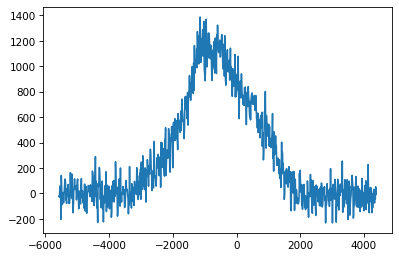

In [30]:
raw_data = f['solenoid_scan_OTR1_2020-06-21T09:48:47']['beam_data']['step0']['sample0']['raw_data']
xaxis = raw_data['XCOORD']
xprof = raw_data['XPROF']

# Unit for axis in um and intensity is arb./based on pixels
print(raw_data.attrs['unit'])
plt.plot(xaxis, xprof)
plt.show()

In [59]:
xdata = []
ydata = []

# Top group name
for key in f.keys(): 
    beam_key   = key+'/beam_data'
    beam_group = f[beam_key]
    nsteps     = len(beam_group.keys())
    if nsteps > 0:
        print(key)
        print('steps',nsteps)
        nsamples = len(beam_group['step0'])
        #print('samples',samples)
        for step in beam_group:
            #print(step)
            for sample in beam_group[step]:
                try:
                    xdata.append(beam_group[step][sample]['Gaussian']['stats_XRMS'][()])
                    ydata.append(beam_group[step][sample]['Gaussian']['stats_YRMS'][()])
                except:
                    pass

solenoid_scan_OTR1_2020-06-21T09:48:47
steps 15
solenoid_scan_OTR2_2020-06-21T10:00:53
steps 15
solenoid_scan_OTR2_2020-07-09T00:57:46
steps 7
solenoid_scan_OTR2_2020-07-09T01:07:21
steps 5
solenoid_scan_OTR2_2020-07-09T02:35:55
steps 7
solenoid_scan_OTR2_2020-07-09T02:44:37
steps 7
solenoid_scan_OTR2_2020-07-09T04:45:16
steps 7
solenoid_scan_OTR3_2020-06-21T10:13:08
steps 15
solenoid_scan_YAG02_2020-06-21T09:17:33
steps 15
solenoid_scan_YAG02_2020-06-21T10:28:05
steps 15
solenoid_scan_YAG02_2020-06-21T14:33:32
steps 7
solenoid_scan_YAG02_2020-07-09T01:15:53
steps 1
solenoid_scan_YAG02_2020-07-09T01:32:37
steps 9
solenoid_scan_YAG02_2020-07-09T03:05:02
steps 9
solenoid_scan_YAG02_2020-07-09T05:01:14
steps 9
solenoid_scan_YAG03_2020-06-21T09:27:37
steps 15
solenoid_scan_YAG03_2020-06-21T09:38:46
steps 15


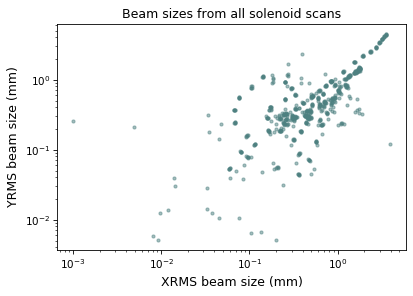

In [60]:
x = np.array(xdata)*10**-3
y = np.array(ydata)*10**-3
#print(len(x))
plt.plot(x,y, '.', c = [0.3,0.5,0.5], alpha=0.5)
plt.title('Beam sizes from all solenoid scans')
plt.xlabel('XRMS beam size (mm)', size=12)
plt.ylabel('YRMS beam size (mm)', size=12)
#plt.xlim(0,3)
#plt.ylim(0,3)
plt.yscale("log")
plt.xscale("log")
plt.savefig('all_beamsizes.pdf', bbox_inches='tight', dpi=600)
plt.show()

# How to open Emittance scan files

In [74]:
emitfile = '2020_summer_cu_inj_emit_data.h5'
f         = h5py.File(emitfile, 'r')  
list(f.keys())

['emit_scan_OTR2_2020-06-11T00:54:57',
 'emit_scan_OTR2_2020-06-11T01:16:44',
 'emit_scan_OTR2_2020-06-11T01:21:42',
 'emit_scan_OTR2_2020-06-11T04:31:57',
 'emit_scan_OTR2_2020-06-11T04:44:55',
 'emit_scan_OTR2_2020-06-11T04:52:05',
 'emit_scan_OTR2_2020-06-11T05:04:40',
 'emit_scan_OTR2_2020-06-11T05:30:28',
 'emit_scan_OTR2_2020-06-11T05:36:38',
 'emit_scan_OTR2_2020-06-11T20:33:44',
 'emit_scan_OTR2_2020-06-11T20:37:55',
 'emit_scan_OTR2_2020-06-11T20:39:49',
 'emit_scan_OTR2_2020-06-12T20:48:44',
 'emit_scan_OTR2_2020-06-12T20:54:46',
 'emit_scan_OTR2_2020-06-12T22:54:41',
 'emit_scan_OTR2_2020-06-21T08:39:23',
 'emit_scan_OTR2_2020-06-21T08:47:29',
 'emit_scan_OTR2_2020-06-21T14:46:13',
 'emit_scan_OTR2_2020-06-21T14:51:52',
 'emit_scan_OTR2_2020-06-21T16:12:38',
 'emit_scan_OTR2_2020-06-21T16:51:08',
 'emit_scan_OTR2_2020-06-21T16:54:25',
 'emit_scan_OTR2_2020-06-21T16:59:44',
 'emit_scan_OTR2_2020-06-22T23:03:13',
 'emit_scan_OTR2_2020-06-22T23:15:21',
 'emit_scan_OTR2_2020-06-

In [140]:
list(f['emit_scan_OTR2_2020-06-11T00:54:57'].attrs)

['ctrl_pv', 'data_types', 'file', 'isotime', 'matlab_timestamp']

In [205]:
f['emit_scan_OTR2_2020-06-11T00:54:57'].attrs['file']

'/u1/lcls/matlab/data/2020/2020-06/2020-06-11/Emittance-scan-OTRS_IN20_571-2020-06-11-005457.mat'

In [202]:
f['emit_scan_WS12_2020-06-22T23:41:27'].keys()

<KeysViewHDF5 ['beam_data', 'pvdata']>

In [142]:
list(f['emit_scan_OTR2_2020-06-11T00:54:57']['beam_data']['emittance'].attrs)

['emittance_unit']

In [99]:
 list(f['emit_scan_OTR2_2020-06-11T00:54:57']['beam_data'].keys())

['beam_sizes', 'emittance']

In [105]:
list(f['emit_scan_OTR2_2020-06-11T00:54:57']['beam_data']['emittance']['Gaussian'])

['emit_x', 'emit_y']

In [115]:
f['emit_scan_OTR2_2020-06-11T00:54:57']['beam_data']['emittance']['Gaussian']['emit_x']

<HDF5 dataset "emit_x": shape (), type "<f8">

In [190]:
#f[runlist[0]]['beam_data'].keys()

In [191]:
f[runlist[0]]['beam_data']['emittance']['Gaussian']['emit_x'][()]

0.4748296525242685

In [192]:
#f['emit_scan_OTR2_2020-07-08T02:06:31']['pvdata'].keys() --> looks bad

In [203]:
runlist =['emit_scan_OTR2_2020-06-11T00:54:57',
 'emit_scan_OTR2_2020-06-11T01:16:44',
 'emit_scan_OTR2_2020-06-11T01:21:42',
 'emit_scan_OTR2_2020-06-11T04:31:57',
 'emit_scan_OTR2_2020-06-11T04:44:55',
 'emit_scan_OTR2_2020-06-11T04:52:05',
 'emit_scan_OTR2_2020-06-11T05:04:40',
 'emit_scan_OTR2_2020-06-11T05:30:28',
 'emit_scan_OTR2_2020-06-11T05:36:38',
 'emit_scan_OTR2_2020-06-11T20:33:44',
 'emit_scan_OTR2_2020-06-11T20:37:55',
 'emit_scan_OTR2_2020-06-11T20:39:49',
 'emit_scan_OTR2_2020-06-12T20:48:44',
 'emit_scan_OTR2_2020-06-12T20:54:46',
 'emit_scan_OTR2_2020-06-12T22:54:41',
 'emit_scan_OTR2_2020-06-21T08:39:23',
 'emit_scan_OTR2_2020-06-21T08:47:29',
 'emit_scan_OTR2_2020-06-21T14:46:13',
 'emit_scan_OTR2_2020-06-21T14:51:52',
 'emit_scan_OTR2_2020-06-21T16:12:38',
 'emit_scan_OTR2_2020-06-21T16:51:08',
 'emit_scan_OTR2_2020-06-21T16:54:25',
 'emit_scan_OTR2_2020-06-21T16:59:44',
 'emit_scan_OTR2_2020-06-22T23:03:13',
 'emit_scan_OTR2_2020-06-22T23:15:21',
 'emit_scan_OTR2_2020-06-22T23:19:06',
 'emit_scan_OTR2_2020-06-22T23:23:02',
 'emit_scan_OTR2_2020-07-08T01:52:47',
 'emit_scan_OTR2_2020-07-08T01:56:48',
 'emit_scan_OTR2_2020-07-09T04:43:43',
 'emit_scan_OTR2_2020-07-19T19:31:08',
 'emit_scan_OTR2_2020-07-29T14:14:35',
 'emit_scan_OTR2_2020-07-29T14:17:25',
 'emit_scan_OTR2_2020-07-29T14:44:21',
 'emit_scan_OTR2_2020-07-29T14:47:28',
 'emit_scan_OTR2_2020-07-29T14:52:05',
 'emit_scan_OTR2_2020-07-30T05:05:34',
          
'emit_scan_WS02_2020-06-11T02:50:25',
 'emit_scan_WS02_2020-06-11T03:16:42',
 'emit_scan_WS02_2020-06-11T03:18:51',
 'emit_scan_WS02_2020-06-11T03:24:38',
 'emit_scan_WS02_2020-06-11T03:31:03',
 'emit_scan_WS02_2020-06-11T03:32:35',
 'emit_scan_WS02_2020-06-11T03:39:26',
 'emit_scan_WS02_2020-06-11T03:43:37',
 'emit_scan_WS02_2020-06-11T03:46:26',
 'emit_scan_WS02_2020-06-11T04:27:31',
 'emit_scan_WS02_2020-06-11T04:29:48',
 'emit_scan_WS02_2020-06-11T05:07:25',
 'emit_scan_WS02_2020-06-11T05:09:03',
 'emit_scan_WS02_2020-06-11T05:13:56',
 'emit_scan_WS02_2020-06-11T05:15:42',
 'emit_scan_WS02_2020-06-11T05:20:37',
 'emit_scan_WS02_2020-06-11T05:22:38',
 'emit_scan_WS02_2020-06-11T05:33:13',
 'emit_scan_WS02_2020-06-11T05:34:49',
 'emit_scan_WS02_2020-06-11T06:24:48',
 'emit_scan_WS02_2020-06-11T06:26:34',
 'emit_scan_WS02_2020-06-11T07:24:11',
 'emit_scan_WS02_2020-06-11T07:25:57',
 'emit_scan_WS02_2020-06-11T20:45:23',
 'emit_scan_WS02_2020-06-11T20:47:07',
 'emit_scan_WS02_2020-06-12T08:10:09',
 'emit_scan_WS02_2020-06-12T20:57:17',
 'emit_scan_WS02_2020-06-12T20:58:44',
 'emit_scan_WS02_2020-06-21T08:41:47',
 'emit_scan_WS02_2020-06-21T08:43:54',
 'emit_scan_WS02_2020-06-21T08:45:31',
 'emit_scan_WS02_2020-06-21T14:55:53',
 'emit_scan_WS02_2020-06-21T14:57:48',
 'emit_scan_WS02_2020-06-21T15:00:08',
 'emit_scan_WS02_2020-07-08T18:17:01',
 'emit_scan_WS02_2020-07-08T18:19:10',
 'emit_scan_WS02_2020-07-09T05:49:10',
 'emit_scan_WS02_2020-07-09T05:52:05',
 'emit_scan_WS02_2020-07-09T06:28:00',
 'emit_scan_WS02_2020-07-09T06:29:45',
 'emit_scan_WS02_2020-07-09T06:44:11',
 'emit_scan_WS02_2020-07-09T06:46:10',
 'emit_scan_WS02_2020-07-18T10:08:18',
 'emit_scan_WS02_2020-07-18T10:10:40',
 'emit_scan_WS02_2020-07-19T19:33:04',
 'emit_scan_WS02_2020-07-19T20:03:28',
 'emit_scan_WS02_2020-07-29T17:52:12',
 'emit_scan_WS02_2020-07-29T17:53:47']

In [215]:
f[key].attrs['isotime']

'2020-06-11T01:16:44.312312-07:00'

In [216]:
f[key].attrs['matlab_timestamp']

737953.0532906518

In [217]:
#Get EMITTANCE
pvlist=['ACCL:IN20:300:L0A_PDES',
'ACCL:IN20:400:L0B_PDES',
'IRIS:LR20:130:MOTR_ANGLE',
'QUAD:IN20:121:BDES',
'QUAD:IN20:122:BDES',
'SOLN:IN20:121:BDES']

measlist=['emit_x','emit_y'] 

inputs = np.empty((len(runlist),len(pvlist)))
outputs = np.empty((len(runlist),2))
ts1 = []
ts2 = []
row=0
for key in runlist:

    print(key)
    emit_group = f[key]['beam_data']['emittance']
    pv_group = f[key]['pvdata'].attrs
    
    outputs[row,0]=emit_group['Gaussian'][measlist[0]][()]
    outputs[row,1]=emit_group['Gaussian'][measlist[1]][()]
    ts1.append(f[key].attrs['isotime'])
    ts2.append(f[key].attrs['matlab_timestamp'])
    
    column=0
    for pv in pvlist:
        inputs[row,column] = pv_group[pv]
        column=column+1
    row=row+1

emit_scan_OTR2_2020-06-11T00:54:57
emit_scan_OTR2_2020-06-11T01:16:44
emit_scan_OTR2_2020-06-11T01:21:42
emit_scan_OTR2_2020-06-11T04:31:57
emit_scan_OTR2_2020-06-11T04:44:55
emit_scan_OTR2_2020-06-11T04:52:05
emit_scan_OTR2_2020-06-11T05:04:40
emit_scan_OTR2_2020-06-11T05:30:28
emit_scan_OTR2_2020-06-11T05:36:38
emit_scan_OTR2_2020-06-11T20:33:44
emit_scan_OTR2_2020-06-11T20:37:55
emit_scan_OTR2_2020-06-11T20:39:49
emit_scan_OTR2_2020-06-12T20:48:44
emit_scan_OTR2_2020-06-12T20:54:46
emit_scan_OTR2_2020-06-12T22:54:41
emit_scan_OTR2_2020-06-21T08:39:23
emit_scan_OTR2_2020-06-21T08:47:29
emit_scan_OTR2_2020-06-21T14:46:13
emit_scan_OTR2_2020-06-21T14:51:52
emit_scan_OTR2_2020-06-21T16:12:38
emit_scan_OTR2_2020-06-21T16:51:08
emit_scan_OTR2_2020-06-21T16:54:25
emit_scan_OTR2_2020-06-21T16:59:44
emit_scan_OTR2_2020-06-22T23:03:13
emit_scan_OTR2_2020-06-22T23:15:21
emit_scan_OTR2_2020-06-22T23:19:06
emit_scan_OTR2_2020-06-22T23:23:02
emit_scan_OTR2_2020-07-08T01:52:47
emit_scan_OTR2_2020-

In [219]:
pd_in=pandas.DataFrame(inputs,columns=pvlist)

In [221]:
pd_out=pandas.DataFrame(outputs,columns=measlist)

In [222]:
pd_out['isotime']=ts1

In [223]:
pd_out['matlab_timestamp']=ts2

In [224]:
pd_out['file']=runlist

In [230]:
df=pd.concat([pd_in,pd_out],axis=1)

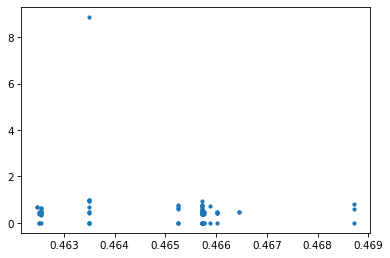

In [240]:
plt.plot(df['SOLN:IN20:121:BDES'],df['emit_x'],'.')

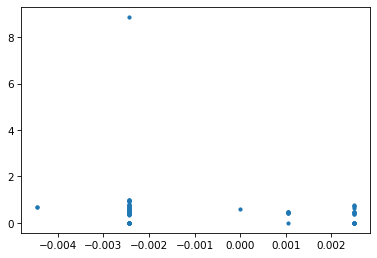

In [241]:
plt.plot(df['QUAD:IN20:121:BDES'],df['emit_x'],'.')

In [ ]:
plt.plot(df['QUAD:IN20:121:BDES'][0:37],df['emit_x'][0:37],'.')

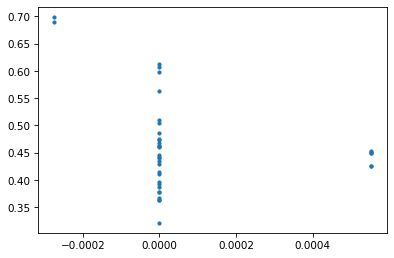

In [238]:
plt.plot(df['QUAD:IN20:122:BDES'][0:37],df['emit_x'][0:37],'.')

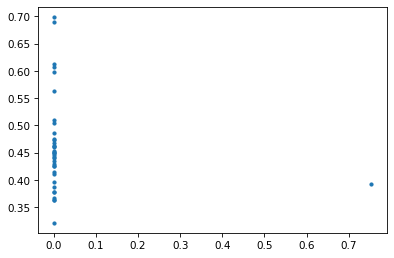

In [239]:
plt.plot(df['ACCL:IN20:300:L0A_PDES'][0:37],df['emit_x'][0:37],'.')

In [242]:
import pandas as pd
store = pd.HDFStore('store.h5')

store['df'] = df  # save it
store['df']  # load it


,ACCL:IN20:300:L0A_PDES,ACCL:IN20:400:L0B_PDES,IRIS:LR20:130:MOTR_ANGLE,QUAD:IN20:121:BDES,QUAD:IN20:122:BDES,SOLN:IN20:121:BDES,emit_x,emit_y,isotime,matlab_timestamp,file
0,0.000000,-2.5,220.199997,-0.002441,0.000000,0.463500,0.474830,0.470404,2020-06-11T00:54:57.020600-07:00,737953.038160,emit_scan_OTR2_2020-06-11T00:54:57
1,0.000000,-2.5,220.199997,-0.002441,0.000000,0.463500,0.459884,0.484624,2020-06-11T01:16:44.312312-07:00,737953.053291,emit_scan_OTR2_2020-06-11T01:16:44
2,0.000000,-2.5,220.199997,-0.002441,0.000000,0.463500,0.446228,0.449539,2020-06-11T01:21:42.869343-07:00,737953.056746,emit_scan_OTR2_2020-06-11T01:21:42
3,0.000000,-2.5,220.199997,-0.002441,0.000000,0.465725,0.612395,0.616762,2020-06-11T04:31:57.509984-07:00,737953.188860,emit_scan_OTR2_2020-06-11T04:31:57
4,0.000000,-2.5,220.199997,-0.002441,0.000000,0.465725,0.563129,0.674135,2020-06-11T04:44:55.507786-07:00,737953.197865,emit_scan_OTR2_2020-06-11T04:44:55
...,...,...,...,...,...,...,...,...,...,...,...
80,0.752309,-2.5,220.602005,0.002500,0.000000,0.465753,0.000000,0.442165,2020-07-18T10:10:40.855724-07:00,737990.424084,emit_scan_WS02_2020-07-18T10:10:40
81,0.752309,-2.5,220.602005,0.002500,0.000000,0.465753,0.000000,0.549781,2020-07-19T19:33:04.338006-07:00,737991.814634,emit_scan_WS02_2020-07-19T19:33:04
82,0.752309,-2.5,220.602005,0.002500,0.000000,0.465753,0.466663,0.000000,2020-07-19T20:03:28.523083-07:00,737991.835747,emit_scan_WS02_2020-07-19T20:03:28
83,0.000000,-2.5,220.602005,0.001058,0.000552,0.466020,0.000000,0.500671,2020-07-29T17:52:12.938713-07:00,738001.744594,emit_scan_WS02_2020-07-29T17:52:12


In [117]:
f['emit_scan_OTR2_2020-06-11T00:54:57']['beam_data']['emittance']['Gaussian']['emit_x'][()]

0.4748296525242685

In [111]:
list(f['emit_scan_OTR2_2020-06-11T00:54:57']['beam_data']['emittance']['Gaussian']['emit_x'].attrs)

[]

In [126]:
f['emit_scan_OTR2_2020-06-11T00:54:57']['beam_data']['emittance']['RMS floor']['emit_x'][()]

0.6714266722897511

In [124]:
f['emit_scan_OTR2_2020-06-11T00:54:57']['beam_data']['emittance']['Gaussian']['emit_x'][()]

0.4748296525242685

In [ ]:
f['emit_scan_OTR2_2020-06-11T00:54:57']['beam_data']['emittance']['Gaussian']['emit_x'][()]

In [125]:
f['emit_scan_OTR2_2020-06-11T00:54:57']['beam_data']['emittance']['Super']['emit_x'][()]

0.5041883808052601

In [130]:
f['emit_scan_OTR2_2020-06-11T00:54:57']['beam_data']['emittance']['RMS cut peak']['emit_x'][()]

0.5449554626698553

In [136]:
f['emit_scan_OTR2_2020-06-11T00:54:57']['beam_data']['emittance']['RMS cut area']['emit_x'][()]

0.4813820398422699

In [135]:
list(f['emit_scan_OTR2_2020-06-11T00:54:57']['beam_data']['emittance'])

['Asymmetric',
 'Gaussian',
 'RMS',
 'RMS cut area',
 'RMS cut peak',
 'RMS floor',
 'Super']

In [ ]:
emit_group = f['emit_scan_OTR2_2020-06-11T00:54:57']['beam_data']['emittance']['Gaussian']
emit_x = emit_group['emit_x'][()]
emit_y = emit_group['emit_y'][()]

in_data = []
ydata = []

# Top group name
for key in f.keys(): 
    beam_key   = key+'/beam_data'
    beam_group = f[beam_key]
    nsteps     = len(beam_group.keys())
    if nsteps > 0:
        print(key)
        print('steps',nsteps)
        nsamples = len(beam_group['step0'])
        #print('samples',samples)
        for step in beam_group:
            #print(step)
            for sample in beam_group[step]:
                try:
                    xdata.append(beam_group[step][sample]['Gaussian']['stats_XRMS'][()])
                    ydata.append(beam_group[step][sample]['Gaussian']['stats_YRMS'][()])
                except:
                    pass

In [78]:
 f['emit_scan_OTR2_2020-06-11T00:54:57']['beam_data']['beam_sizes']

<HDF5 group "/emit_scan_OTR2_2020-06-11T00:54:57/beam_data/beam_sizes" (5 members)>

um


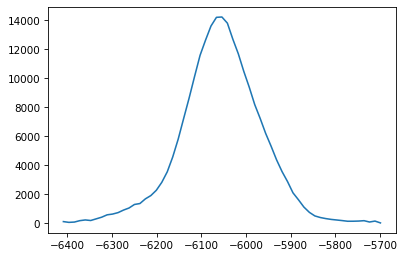

In [75]:
beam_size_group = f['emit_scan_OTR2_2020-06-11T00:54:57']['beam_data']['beam_sizes']
raw_data = beam_size_group['step0']['raw_data']
xaxis = raw_data['XCOORD']
xprof = raw_data['XPROF']

# Unit for axis in um and intensity is arb./based on pixels
print(raw_data.attrs['unit'])
plt.plot(xaxis, xprof)
plt.show()

In [76]:
stat_data = beam_size_group['step0']['Gaussian']['stats_XRMS'][()]
stat_unit = beam_size_group['step0']['Gaussian'].attrs['unit']
print(stat_data, stat_unit)

73.79815942159674 um


In [36]:
# NOTE: Not all files contain both emit_x and emit_y data
# Files w/o one dimension are padded w/ zeros
emit_group = f['emit_scan_OTR2_2020-06-11T00:54:57']['beam_data']['emittance']['Gaussian']
emit_x = emit_group['emit_x'][()]
emit_y = emit_group['emit_y'][()]
print(emit_x, emit_y)

0.4748296525242685 0.47040427234022586


In [79]:
emit_group = f['emit_scan_OTR2_2020-06-11T00:54:57']['beam_data']['emittance']['Gaussian']
emit_x = emit_group['emit_x']

In [93]:
list(f['emit_scan_OTR2_2020-06-11T00:54:57']['pvdata'].attrs)

['ACCL:IN20:300:L0A_PDES',
 'ACCL:IN20:300:L0A_PDES.EGU',
 'ACCL:IN20:400:L0B_PDES',
 'ACCL:IN20:400:L0B_PDES.EGU',
 'IRIS:LR20:130:MOTR_ANGLE',
 'IRIS:LR20:130:MOTR_ANGLE.EGU',
 'QUAD:IN20:121:BDES',
 'QUAD:IN20:121:BDES.EGU',
 'QUAD:IN20:122:BDES',
 'QUAD:IN20:122:BDES.EGU',
 'SOLN:IN20:121:BDES',
 'SOLN:IN20:121:BDES.EGU']

In [96]:
f['emit_scan_OTR2_2020-06-11T00:54:57']['pvdata'].attrs['SOLN:IN20:121:BDES']

'0.4635'